<a href="https://colab.research.google.com/github/alcoleasnoelia/Proyecto1-IA-DigitalHouse-Grupo4/blob/master/Notebook%20II%20-%20Modelos_ML_(title).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Continuación de la notebook anterior)
A partir del título de la noticia realizamos la predicción mediante modelos de 

Notebook 2

4.  Feature Extraction
    *   Count Vectorizer
    *   TF-IDF Vectorizer
5.  Modelado Inicial - Árboles de Decisión
    *   Clasificadores
    *   Cross Validation / GRIDSEARCH / RANDOMSEARCH ETC
    *   Modelos de Ensamble

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import re

import string
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer

In [0]:
def correr_stemming(text):
    # Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return(text)

Cargamos el dataset a partir del pickle generado por la notebook de limpieza:

In [0]:
news = pd.read_pickle("news_.p")

In [0]:
news.head(5)

,title,text,subject,date,fakenews_,title_clean,text_clean,text_polarity,text_subjectivity,title_polarity,title_subjectivity,text_clean_polarity,text_clean_subjectivity,title_clean_polarity,title_clean_subjectivity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,us budget fight looms republicans flip fiscal ...,head conservative republican faction us congre...,0.037083,0.410250,0.00,0.0,0.036979,0.403438,0.0,0.00
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,us military accept transgender recruits monday...,transgender people allowed first time enlist u...,0.055880,0.298557,-0.10,0.1,0.113095,0.296168,-0.1,0.10
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,senior us republican senator let mr mueller job,special counsel investigation links russia pre...,0.115930,0.316798,0.00,0.0,0.129766,0.311252,0.0,0.00
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,fbi russia probe helped australian diplomat ti...,trump campaign adviser george papadopoulos tol...,0.035968,0.306569,0.00,0.0,0.030305,0.276323,0.0,0.00
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,trump wants postal service charge much amazon ...,president donald trump called us postal servic...,0.030093,0.399891,0.35,0.3,0.042130,0.379259,0.2,0.15


Dividimos el dataset en train y test con shuffle y estratificación:

In [0]:
data_train, data_test = train_test_split(news,test_size=0.30,shuffle=True,random_state=10, stratify=news["fakenews_"])

data_train = data_train.copy()
data_test = data_test.copy() 
print("data train shape: {}".format(data_train.shape))
print("data test shape: {}".format(data_test.shape))

data train shape: (31428, 15)
data test shape: (13470, 15)


In [0]:
X_train=data_train["title_clean"].apply(correr_stemming)
X_test=data_test["title_clean"].apply(correr_stemming)
y_train=data_train["fakenews_"].copy()
y_test=data_test["fakenews_"].copy()

# **4.   Feature Extraction**

## CountVectorizer

A partir de una vectorizacion por TFIDF obtenemos 10.000 features principales:

In [0]:
cv=CountVectorizer(max_features=10000, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

X_train_cv1 = pd.DataFrame(X_test_cv.toarray(), columns = cv.get_feature_names())
X_test_cv1 = pd.DataFrame(X_train_cv.toarray(), columns = cv.get_feature_names())
X_train_cv1.shape, X_test_cv1.shape

((13470, 10000), (31428, 10000))

In [0]:
X_train_cv1.head(5)

,aar,aaron,aarp,abadi,abandon,abba,abbott,abc,abcwashington,abdic,...,zoo,zooland,zucker,zuckerberg,zulia,zuma,zummar,zurich,état,žižek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TFIDF

A partir de una vectorizacion por TFIDF obtenemos 10.000 features principales:

In [0]:
tfidf=TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf1 = pd.DataFrame(X_test_tfidf.toarray(), columns = tfidf.get_feature_names())
X_test_tfidf1 = pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf.get_feature_names())
X_train_tfidf1.shape, X_test_tfidf1.shape

((13470, 10000), (31428, 10000))

In [0]:
X_test_tfidf1.head(5)

,aar,aaron,aarp,abadi,abandon,abba,abbott,abc,abcwashington,abdic,...,zoo,zooland,zucker,zuckerberg,zulia,zuma,zummar,zurich,état,žižek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **5.   Modelado Inicial**

## Modelo Naive Bayes

Instanciamos un modelo Naive Bayes a partir de la matriz de features generada

Con vectorización por Count Vectorizer:

In [0]:
mnb_cv=MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)
y_pred_cv=mnb_cv.predict(X_test_cv)

y_pred_cv

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

Con vectorización por TFIDF:

In [0]:
mnb_tfidf=MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf=mnb_tfidf.predict(X_test_cv)

y_pred_tfidf

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

Hacemos un print inicial de comparativa entre las predicciones con cada vectorizacion:

In [0]:
from sklearn import metrics

print('confusion matrix CV: \n', metrics.confusion_matrix(y_test, y_pred_cv))
print('accuracy score  : ', metrics.accuracy_score(y_test, y_pred_cv))
print('/n')
print('confusion matrix TFIDF: \n', metrics.confusion_matrix(y_test, y_pred_tfidf))
print('accuracy score  : ', metrics.accuracy_score(y_test, y_pred_tfidf))

confusion matrix CV: 
 [[5920  505]
 [ 438 6607]]
accuracy score  :  0.929992576095026
/n
confusion matrix TFIDF: 
 [[5898  527]
 [ 438 6607]]
accuracy score  :  0.9283593170007424


Matriz de confusion con vectorizacion por CountVectorizer:

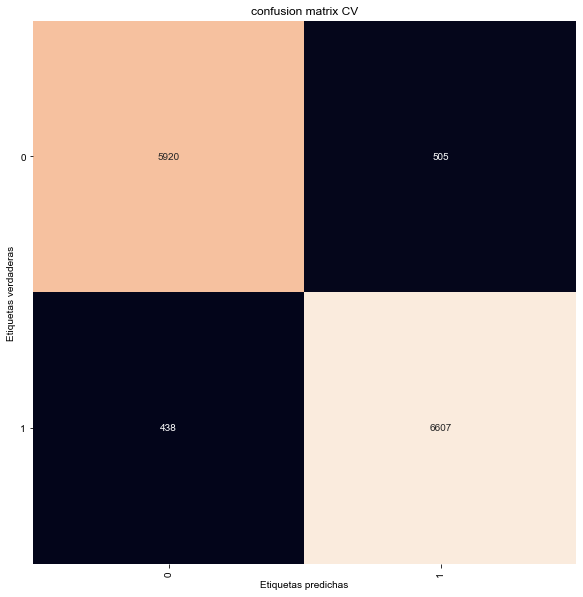

In [0]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 10))
classes = unique_labels(y_test, y_pred_cv)
plt.title("confusion matrix CV")

mat = confusion_matrix(y_test, y_pred_cv)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
sns.set(font_scale=2) 

plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);

plt.savefig('Matriz Confusion Naive-Bayes CV.jpg', dpi=300)

Matriz de confusion con vectorizacion por TFIDF:

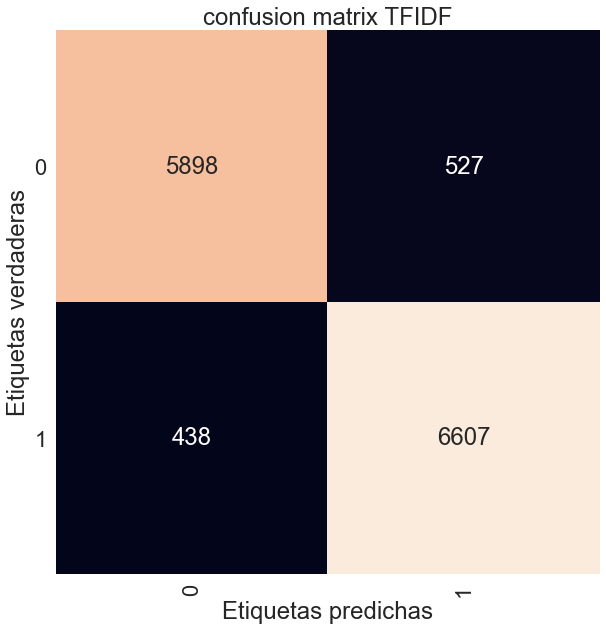

In [0]:
plt.figure(figsize=(10, 10))
classes = unique_labels(y_test, y_pred_tfidf)
plt.title("confusion matrix TFIDF")

mat = confusion_matrix(y_test, y_pred_tfidf)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
sns.set(font_scale=2) 

plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);

plt.savefig('Matriz Confusion Naive-Bayes TFIDF.jpg', dpi=300)

# Clasificador de Árboles de decisión

In [0]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

Configuramos pipelines para optimizar la estructura de los arboles de clasificacion:

In [0]:
pipeline1 = Pipeline([
   ('vect', CountVectorizer()), 
    ('ftr', SelectPercentile()),
    ('tclf', DecisionTreeClassifier()), 
])


pipeline2 = Pipeline([ 
   ('vect', TfidfVectorizer()), 
   ('ftr', SelectPercentile()),
   ('tclf', DecisionTreeClassifier()),
])

In [0]:
parameters = {
    'vect__max_features': [6000, 8000, 12000],
    'vect__stop_words': ['english'],
    'vect__binary': [True,False],
    'vect__min_df': [0.005, 0.01, 0.03],
    'vect__max_df': [0.5, 0.6, 0.7],
    'ftr__percentile':[20, 30, 40, 50],
    'ftr__score_func':[f_classif, chi2],
    'tclf__max_depth': [5,10,15,20,25,30],
    'tclf__max_leaf_nodes':[30, 60, 100],
    'tclf__min_samples_split':[3,5,10,20],
}

Ejecutamos dos busquedas aleatorias (la primera usando el CountVectorizer y la segunda usando TFIDF) iterando sobre los diferentes parametros definidos en la grilla anterior:

In [0]:
random_search1 = RandomizedSearchCV (pipeline1, parameters,n_iter=10, n_jobs = -1 , verbose = 2 , cv=3)
random_search2 = RandomizedSearchCV (pipeline2, parameters,n_iter=10, n_jobs = -1 , verbose = 2 , cv=3)

En la siguientes celdas se muestran los resultados con vectorizacion por CountVectorizer:

In [0]:
print("Performing Randomized Search 1...") 
random_search1.fit(X_train, y_train)

print("Best score: %0.3f" % random_search1.best_score_) 
print("Best parameters set:" )
best_parameters_rs1 = random_search1.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_rs1[param_name])) 

Performing Randomized Search 1...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.3s finished


Best score: 0.830
Best parameters set:
	 ftr__percentile: 40
	 ftr__score_func: <function chi2 at 0x000001BC864578B8>
	 tclf__max_depth: 30
	 tclf__max_leaf_nodes: 100
	 tclf__min_samples_split: 5
	 vect__binary: False
	 vect__max_df: 0.6
	 vect__max_features: 12000
	 vect__min_df: 0.005
	 vect__stop_words: 'english'


In [0]:
random_search1.best_estimator_.fit(X_train,y_train)
y_pred_rs1=random_search1.best_estimator_.predict(X_test)

print("Accuracy sobre Test Random Search 1: {}".format(accuracy_score(y_test, y_pred_rs1)))

Accuracy sobre Test Random Search 1: 0.8278396436525612


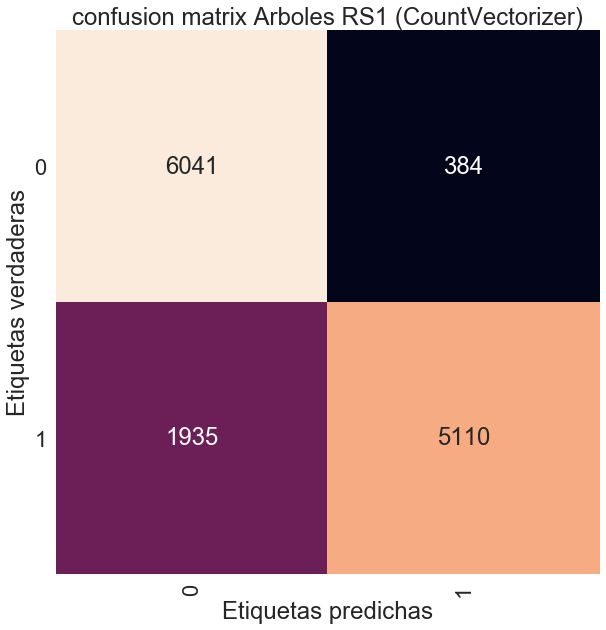

In [0]:
plt.figure(figsize=(10, 10))
classes = unique_labels(y_test, y_pred_rs1)
plt.title("confusion matrix Arboles RS1 (CountVectorizer)")

mat = confusion_matrix(y_test, y_pred_rs1)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
sns.set(font_scale=2) 

plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);

plt.savefig('Matriz Confusion Arboles RS1.jpg', dpi=300)

En las siguientes celdas se muestran los resultados con vectorizacion por TFIDF:

In [0]:
print("Performing Randomized Search 2...") 
random_search2.fit(X_train, y_train)

print("Best score: %0.3f" % random_search2.best_score_) 
print("Best parameters set:" )
best_parameters_rs2 = random_search2.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_rs2[param_name])) 

Performing Randomized Search 2...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


Best score: 0.825
Best parameters set:
	 ftr__percentile: 30
	 ftr__score_func: <function chi2 at 0x000001BC864578B8>
	 tclf__max_depth: 25
	 tclf__max_leaf_nodes: 60
	 tclf__min_samples_split: 20
	 vect__binary: True
	 vect__max_df: 0.6
	 vect__max_features: 12000
	 vect__min_df: 0.005
	 vect__stop_words: 'english'


In [0]:
random_search2.best_estimator_.fit(X_train,y_train)
y_pred_rs2=random_search2.best_estimator_.predict(X_test)

print("Accuracy sobre Test Random Search 2: {}".format(accuracy_score(y_test, y_pred_rs2)))

Accuracy sobre Test Random Search 2: 0.825909428359317


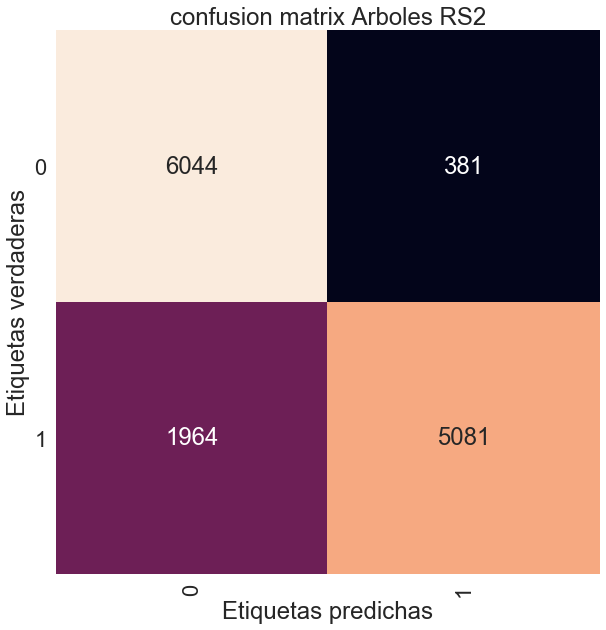

In [0]:
plt.figure(figsize=(10, 10))
classes = unique_labels(y_test, y_pred_rs2)
plt.title("confusion matrix Arboles RS2")

mat = confusion_matrix(y_test, y_pred_rs2)
ax=sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
sns.set(font_scale=2) 

plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
ax.set_xticklabels(classes,rotation=90)
ax.set_yticklabels(classes,rotation=0);

plt.savefig('Matriz Confusion Arboles RS2 (TFIDF).jpg', dpi=300)

# XGBOOST

Realizamos una prueba adicional con un modelo simple (sin gridsearch) por medio de XGBOOST:

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(alpha=10, n_estimators=10, max_depth=5, random_state=1, n_jobs=-1)
xgb.fit(X_train_cv, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [0]:
y_pred = xgb.predict(X_test_cv) 
print(confusion_matrix(y_test, y_pred))
print('accuracy score  : ', metrics.accuracy_score(y_test, y_pred))

[[6157  268]
 [2474 4571]]
accuracy score  :  0.7964365256124721


Se puede apreciar que las métricas no mejoraron respecto al modelo Naive Bayes

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
print('Métricas de predicción para test XGBoost')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred)))

Métricas de predicción para test XGBoost
Accuracy: 79.64%
Recall: 64.88%
Precisión: 94.46%
F1Score: 76.93%


 El valor del AUC es:  0.8735631032302071


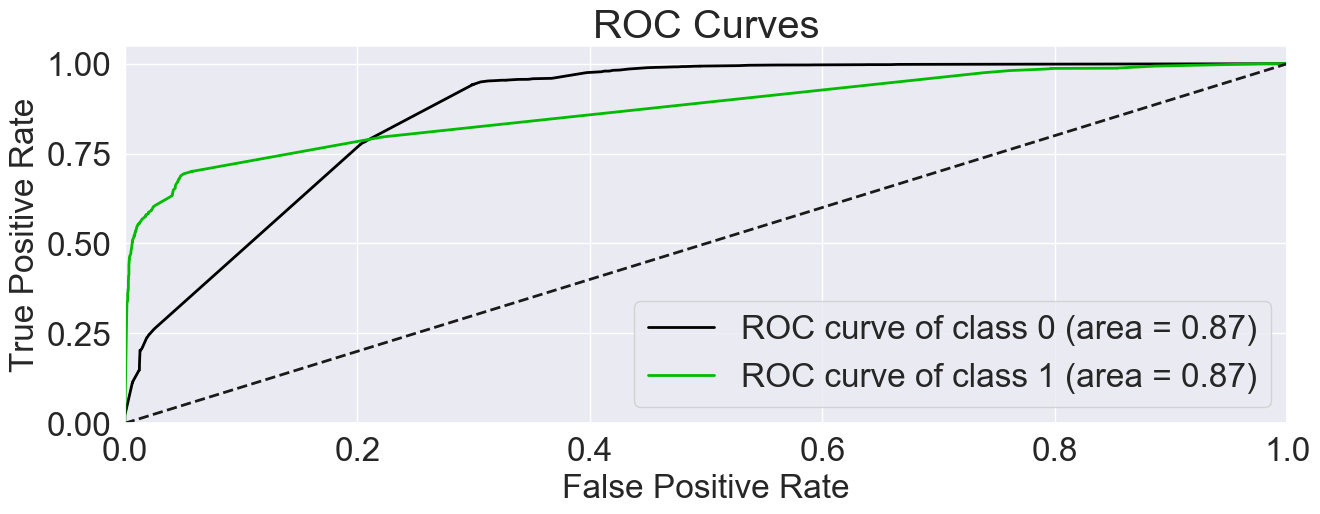

In [0]:

fig, ax = plt.subplots(figsize=(15, 5), dpi=100)   

y_predicted_xgb = xgb.predict_proba(X_test_cv)

xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print(" El valor del AUC es: " , xgb_auc)

plot_roc(y_test,y_predicted_xgb, plot_micro=False, plot_macro=False, ax=ax)